# Multimodal Large Language Model


In [21]:
import torch

print("cuda" if torch.cuda.is_available() else "cpu")

cpu


### OpenClip

In [22]:
from PIL import Image

img = Image.open("../images/dog.jpg").convert("RGB")
caption = "a dog sitting on a field"

In [23]:
from transformers import CLIPModel, CLIPProcessor, CLIPTokenizerFast
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="torch._utils")

In [24]:
model_id = "openai/clip-vit-base-patch32"

clip_tokenizer = CLIPTokenizerFast.from_pretrained(model_id)
clip_processor = CLIPProcessor.from_pretrained(model_id)

model = CLIPModel.from_pretrained(model_id)

In [25]:
print(caption)

a dog sitting on a field


In [26]:
img.show()

In [27]:
# tokenize text/input (preprocessing the text)

inputs = clip_tokenizer(caption, return_tensors="pt")
print(inputs.input_ids)

tensor([[49406,   320,  1929,  4919,   525,   320,  1570, 49407]])


In [28]:
# convert text/input back to tokens

clip_tokenizer.convert_ids_to_tokens(inputs.input_ids[0])

['<|startoftext|>',
 'a</w>',
 'dog</w>',
 'sitting</w>',
 'on</w>',
 'a</w>',
 'field</w>',
 '<|endoftext|>']

In [29]:
clip_tokenizer.vocab_size

49408

In [30]:
# text embedding

text_embedding = model.get_text_features(**inputs)
text_embedding.shape

torch.Size([1, 512])

In [34]:
# load an image

image = Image.open("../images/dog.jpg").convert("RGB")
processed_image = clip_processor(images=image, return_tensors="pt")["pixel_values"]

processed_image.shape

torch.Size([1, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..2.145897].


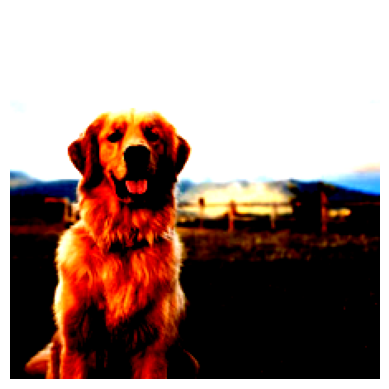

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import torch

img = processed_image.squeeze(0)
img = img.permute(1, 2, 0)

img = img.numpy()

plt.imshow(img)
plt.axis("off")
plt.show()

In [37]:
# create image embedding

image_embedding = model.get_image_features(processed_image)
image_embedding.shape

torch.Size([1, 512])

In [38]:
# normalize the embedding

text_embedding /= text_embedding.norm(dim=-1, keepdim=True)
image_embedding /= image_embedding.norm(dim=-1, keepdim=True)

In [39]:
# calculate their similarity

text_embedding = text_embedding.detach().cpu().numpy()
image_embedding = image_embedding.detach().cpu().numpy()

score = text_embedding @ image_embedding.T
score

array([[0.29844508]], dtype=float32)

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(image_embedding, text_embedding)

similarity_matrix

array([[0.29844514]], dtype=float32)

#### SBERT (Sentence-BERT)

In [46]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer("clip-ViT-B-32")

image_embedding = model.encode(image)
text_embedding = model.encode(caption)

similarity_matrix = cosine_similarity([image_embedding], [text_embedding])
print(similarity_matrix)

[[0.29844517]]


### Text Generation Models Multimodal
- BLIP-2: Bridging the Vision-Language Gap (Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation 2)